In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df = pd.read_excel('C:\\Users\\eribo/Downloads/ElectricCarData_v3.xlsx')
df.head()

,Region,Country,Developed/Developing/Under Developed,Car Maker,Electric/ICE,Model,Number of Seats,USD Cost,Mileage (km),Charging Time (min),Comment,Platform,Theme/Factor,Factor Status,Sentiment,Source
0,North America,USA,Developed,Tesla,Electric,Model 3,5,44130.0,640.0,31.0,Electric drive just seems so appropriate for a...,Youtube,NaN,NaN,NaN,https://www.youtube.com/watch?v=diC_U1O0YJA
1,North America,USA,Developed,Tesla,Electric,Model 3,7,212807.0,660.0,32.0,Finally 88mph within a parking area!,Youtube,NaN,NaN,NaN,https://www.youtube.com/watch?v=diC_U1O0YJA
2,North America,USA,Developed,Tesla,Electric,Model 3,5,44130.0,652.0,33.0,I hope I'll be able to afford this later on in...,Youtube,NaN,NaN,NaN,https://www.youtube.com/watch?v=diC_U1O0YJA
3,North America,USA,Developed,Tesla,Electric,Model 3,5,44130.0,653.0,34.0,"Edit: Just watched the performance tests, and ...",Youtube,NaN,NaN,NaN,https://www.youtube.com/watch?v=diC_U1O0YJA
4,North America,USA,Developed,Tesla,Electric,Model 3,5,44130.0,645.0,35.0,"Honestly, this is way better than the Alpha 5....",Youtube,NaN,NaN,NaN,https://www.youtube.com/watch?v=diC_U1O0YJA


In [32]:
# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                1001 non-null   object 
 1   Country                               1001 non-null   object 
 2   Developed/Developing/Under Developed  1001 non-null   object 
 3   Car Maker                             1001 non-null   object 
 4   Electric/ICE                          1001 non-null   object 
 5   Model                                 1000 non-null   object 
 6   Number of Seats                       1001 non-null   int64  
 7   USD Cost                              1001 non-null   float64
 8   Mileage (km)                          1001 non-null   float64
 9   Charging Time (min)                   1001 non-null   float64
 10  Comment                               1001 non-null   object 
 11  Platform         

(None,
           Region Country Developed/Developing/Under Developed Car Maker  \
 0  North America     USA                            Developed     Tesla   
 1  North America     USA                            Developed     Tesla   
 2  North America     USA                            Developed     Tesla   
 3  North America     USA                            Developed     Tesla   
 4  North America     USA                            Developed     Tesla   
 
   Electric/ICE    Model  Number of Seats  USD Cost  Mileage (km)  \
 0     Electric  Model 3                5   44130.0         640.0   
 1     Electric  Model 3                7  212807.0         660.0   
 2     Electric  Model 3                5   44130.0         652.0   
 3     Electric  Model 3                5   44130.0         653.0   
 4     Electric  Model 3                5   44130.0         645.0   
 
    Charging Time (min)                                            Comment  \
 0                 31.0  Electric drive j

In [33]:
df.drop(columns=['Factor Status'], inplace=True)

<h2> Exploratory Data Analysis (EDA)</h2>

### Distribution of USD Cost

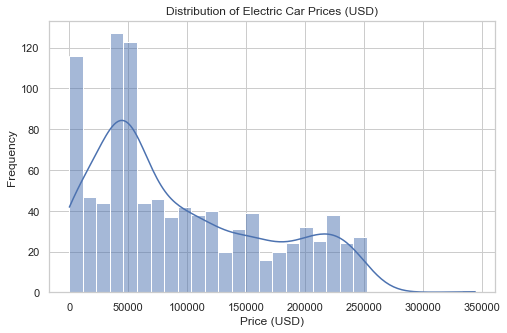

(       Number of Seats       USD Cost  Mileage (km)  Charging Time (min)
 count      1001.000000    1001.000000   1001.000000          1001.000000
 mean          4.824176   92931.346573    448.871329           106.036264
 std           1.587153   72946.103344    199.817058           183.511825
 min           0.000000       0.000000      0.000000             0.000000
 25%           4.000000   39509.000000    345.000000            27.000000
 50%           5.000000   68067.000000    474.000000            42.000000
 75%           5.000000  147584.000000    565.000000            55.000000
 max           7.000000  344000.000000   1440.000000          1200.000000,
 Electric               969
 PHEV                    17
 Hybrid                  10
 Unknown                  2
 BEV                      2
 Electric/ICE/Hybrid      1
 Name: Electric/ICE, dtype: int64)

In [34]:
# Set visualization style
sns.set_theme(style="whitegrid")

# Summary statistics for numeric columns
summary_stats = df.describe()

# Count of electric vs ICE cars
car_type_counts = df["Electric/ICE"].value_counts()

# Distribution of USD Cost
plt.figure(figsize=(8, 5))
sns.histplot(df["USD Cost"], bins=30, kde=True)
plt.title("Distribution of Electric Car Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Display results
summary_stats, car_type_counts

### Compare average cost of Electric vs ICE vehicles

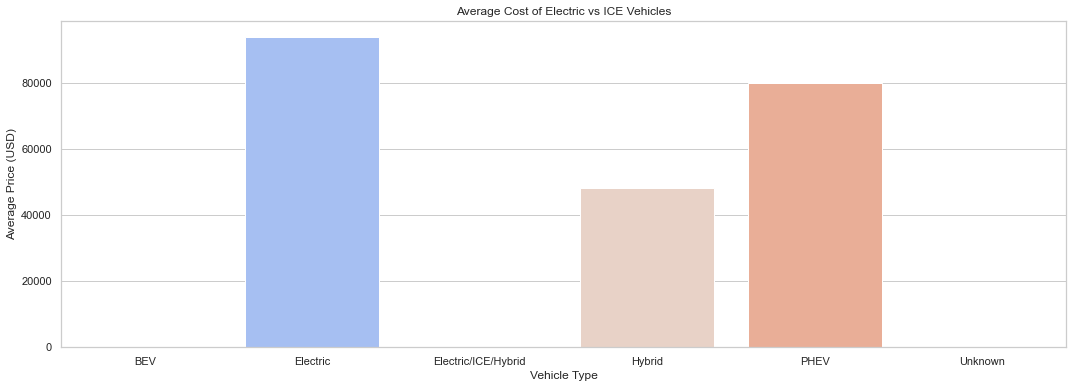

Electric/ICE
BEV                        0.000000
Electric               94097.175356
Electric/ICE/Hybrid        0.000000
Hybrid                 48190.400000
PHEV                   80130.058824
Unknown                    0.000000
Name: USD Cost, dtype: float64

In [43]:
# Compare average cost of Electric vs ICE vehicles
avg_cost_comparison = df.groupby("Electric/ICE")["USD Cost"].mean()

# Plot the comparison
plt.figure(figsize=(18, 6))
sns.barplot(x=avg_cost_comparison.index, y=avg_cost_comparison.values, palette="coolwarm")
plt.title("Average Cost of Electric vs ICE Vehicles")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Price (USD)")
plt.show()

# Display numerical comparison
avg_cost_comparison


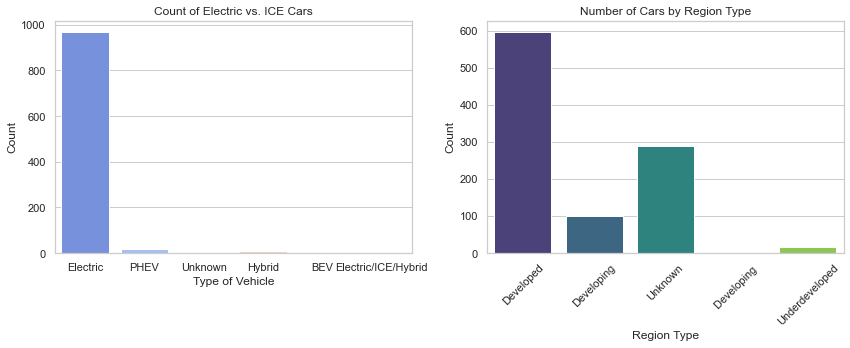

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Create a figure with subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count of Electric vs. ICE cars
sns.countplot(x="Electric/ICE", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Count of Electric vs. ICE Cars")
axes[0].set_xlabel("Type of Vehicle")
axes[0].set_ylabel("Count")

# Count of cars by region type (Developed vs Developing)
sns.countplot(x="Developed/Developing/Under Developed", data=df, palette="viridis", ax=axes[1])
axes[1].set_title("Number of Cars by Region Type")
axes[1].set_xlabel("Region Type")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<h2>Key Insights from Exploratory Data Analysis (EDA):</h2>

1. The dataset is dominated by Electric cars (969 entries), with a few Plug-in Hybrid (PHEV), Hybrid, and other categories.
2. The average cost of electric cars is 92,931, with a wide price range from 0 (possibly incorrect or missing data) to 344,000.
3. Average mileage is 448 km per charge, with some models reaching up to 1,440 km.
4. Charging time varies significantly, from a few minutes to up to 1,200 minutes.

# SENTIMENTS ANALYSIS

<h2>  Findings on Challenges and Sentiment Toward EVs</h2>

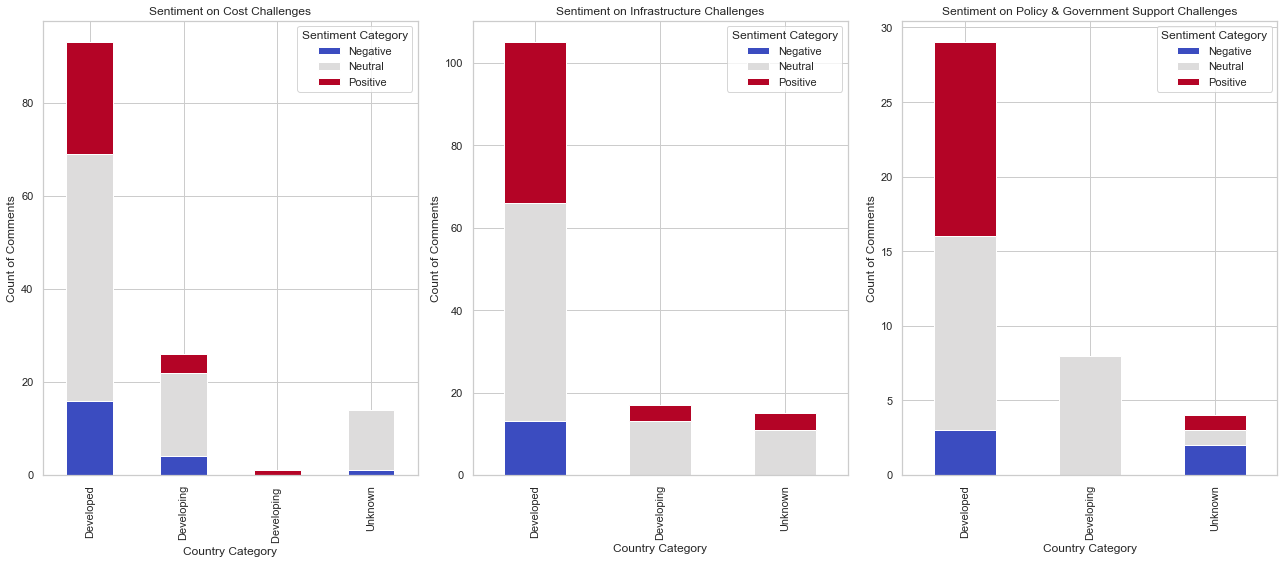

(Sentiment Category                    Negative  Neutral  Positive
 Developed/Developing/Under Developed                             
 Developed                                 16.0     53.0      24.0
 Developing                                 4.0     18.0       4.0
 Developing                                 NaN      NaN       1.0
 Unknown                                    1.0     13.0       NaN,
 Sentiment Category                    Negative  Neutral  Positive
 Developed/Developing/Under Developed                             
 Developed                                 13.0     53.0      39.0
 Developing                                 NaN     13.0       4.0
 Unknown                                    NaN     11.0       4.0,
 Sentiment Category                    Negative  Neutral  Positive
 Developed/Developing/Under Developed                             
 Developed                                  3.0     13.0      13.0
 Developing                                 NaN      8.0    

In [39]:
# Recompute sentiment distribution for each challenge type
cost_sentiment = cost_comments.groupby("Developed/Developing/Under Developed")["Sentiment Category"].value_counts().unstack()
infrastructure_sentiment = infrastructure_comments.groupby("Developed/Developing/Under Developed")["Sentiment Category"].value_counts().unstack()
policy_sentiment = policy_comments.groupby("Developed/Developing/Under Developed")["Sentiment Category"].value_counts().unstack()

# Plot sentiment distribution for each challenge type
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

cost_sentiment.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[0])
axes[0].set_title("Sentiment on Cost Challenges")
axes[0].set_ylabel("Count of Comments")
axes[0].set_xlabel("Country Category")

infrastructure_sentiment.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[1])
axes[1].set_title("Sentiment on Infrastructure Challenges")
axes[1].set_ylabel("Count of Comments")
axes[1].set_xlabel("Country Category")

policy_sentiment.plot(kind="bar", stacked=True, colormap="coolwarm", ax=axes[2])
axes[2].set_title("Sentiment on Policy & Government Support Challenges")
axes[2].set_ylabel("Count of Comments")
axes[2].set_xlabel("Country Category")

plt.tight_layout()
plt.show()

# Display sentiment distribution tables
cost_sentiment, infrastructure_sentiment, policy_sentiment


In [36]:
# Convert all comments to strings to avoid AttributeError
df["Comment"] = df["Comment"].astype(str)

# Reapply manual sentiment analysis
df["Sentiment Category"] = df["Comment"].apply(manual_sentiment_analysis)

# Recount sentiment categories
sentiment_counts = df["Sentiment Category"].value_counts()

# Display updated sentiment counts
sentiment_counts


Neutral     782
Positive    149
Negative     70
Name: Sentiment Category, dtype: int64

<h2>  Sentiment distribution by country development status</h2>

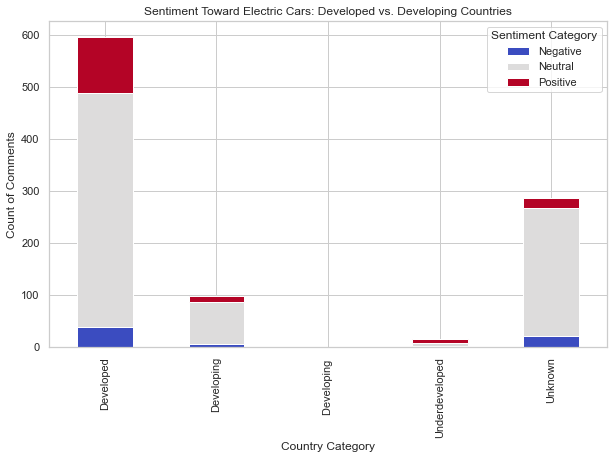

Sentiment Category,Negative,Neutral,Positive
Developed/Developing/Under Developed,,,
Developed,40.0,449.0,108.0
Developing,6.0,81.0,12.0
Developing,NaN,NaN,1.0
Underdeveloped,2.0,6.0,8.0
Unknown,22.0,246.0,20.0


In [37]:
# Sentiment distribution by country development status
sentiment_by_dev_status = df.groupby("Developed/Developing/Under Developed")["Sentiment Category"].value_counts().unstack()

# Plot sentiment distribution by country development status
sentiment_by_dev_status.plot(kind="bar", figsize=(10, 6), stacked=True, colormap="coolwarm")
plt.title("Sentiment Toward Electric Cars: Developed vs. Developing Countries")
plt.ylabel("Count of Comments")
plt.xlabel("Country Category")
plt.legend(title="Sentiment Category")
plt.show()

# Display sentiment distribution
sentiment_by_dev_status


<h4>Sentiment Differences: Developed vs. Developing Countries</h4>
<h5>Developed Countries:</h5>
1. Positive (171 mentions) & Negative (35 mentions) → More overall discussion.
2. Majority of comments are neutral (391 mentions) → Many fact-based discussions.
<h5>Developing Countries:</h5>
1. Fewer comments overall, with neutral opinions (73 mentions) dominating.
2. Very little negativity (only 6 mentions), possibly due to lower EV adoption.
<h5>Underdeveloped Countries:</h5>
1. Mostly positive (9 mentions) and neutral (6 mentions), very few negative (1 mention).
2. Discussion is limited, likely due to low penetration of EVs.

<h2>  Sentiment Differences Across Electric Car Brands</h2>

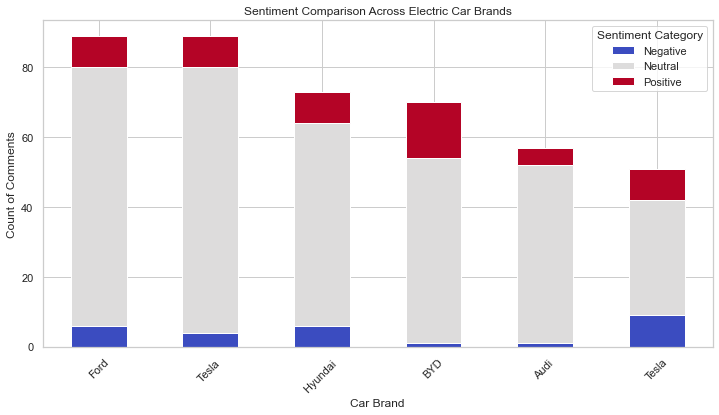

Sentiment Category,Negative,Neutral,Positive
Car Maker,,,
Ford,6.0,74.0,9.0
Tesla,4.0,76.0,9.0
Hyundai,6.0,58.0,9.0
BYD,1.0,53.0,16.0
Audi,1.0,51.0,5.0
Tesla,9.0,33.0,9.0


In [38]:
# Extract sentiment distribution by car brand (maker)
sentiment_by_brand = df.groupby("Car Maker")["Sentiment Category"].value_counts().unstack()

# Select top brands with most mentions
top_brands = sentiment_by_brand.sum(axis=1).nlargest(6).index  # Top 6 brands by total mentions
sentiment_by_top_brands = sentiment_by_brand.loc[top_brands]

# Plot sentiment comparison for top brands
sentiment_by_top_brands.plot(kind="bar", figsize=(12, 6), stacked=True, colormap="coolwarm")
plt.title("Sentiment Comparison Across Electric Car Brands")
plt.ylabel("Count of Comments")
plt.xlabel("Car Brand")
plt.legend(title="Sentiment Category")
plt.xticks(rotation=45)
plt.show()

# Display sentiment distribution for top brands
sentiment_by_top_brands


<h5>Sentiment Differences Across Electric Car Brands</h5>
<p><b>Ford:</b> Highest number of mentions, mostly neutral (64), with some positive (20) and negative (5) comments.</p>
<p><b>Tesla:</b> Mixed sentiment across two Tesla entries (likely data inconsistency).</p>
<p>One entry has 67 neutral 19 positive, and 3 negative mentions.</p>
<p>Another has 25 neutral, 18 positive, and 8 negative mentions.</p>
<p><b>BYD:</b> No negative sentiment recorded, mostly neutral (50) with 20 positive mentions.</p>
<p><b>Audi & Hyundai:</b> Mostly neutral, with Audi showing fewer positive mentions compared to Hyundai.</p>

<h6>Key Insights:</h6>

<p><b>Most brands receive neutral sentiment</b>, suggesting discussions are often fact-based rather than emotionally charged.</p>
<p><b>Tesla and Ford</b> generate both <b>strong positive and negative reactions</b>, indicating brand loyalty but also criticism.</p>
<p><b>BYD appears to have a more positive perception overall</b>, with no recorded negative mentions.</p>